実装したロジスティック回帰モデルとADALINEを比較する

In [1]:
from sklearn import datasets
import numpy as np

In [2]:
# iris データの読み込み
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
print(f"Class labels: {np.unique(y)}")

Class labels: [0 1 2]


In [3]:
# 訓練データとテストデータへの分割
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

print(f"Labels counts in y: {np.bincount(y)}")
print(f"Labels counts in y_train: {np.bincount(y_train)}")
print(f"Labels counts in y_test: {np.bincount(y_test)}")

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


In [4]:
# 訓練データを用いた標準化
from sklearn.preprocessing import StandardScaler

sc = StandardScaler().fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

print(X_train_std.mean(), X_train_std.std())
print(X_test_std.mean(), X_test_std.std())

1.0150610510858574e-16 0.9999999999999999
-0.024516396323407026 0.9616054315705168


## 自分で実装したロジスティック回帰による分類

In [5]:
X_train_01_subset = X_train_std[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

In [6]:
from study_pytorch.adaline import LoggisticRegressionGD

lrgd = LoggisticRegressionGD(eta=0.3, n_iter=1000, random_state=1)

lrgd.fit(X_train_01_subset, y_train_01_subset)

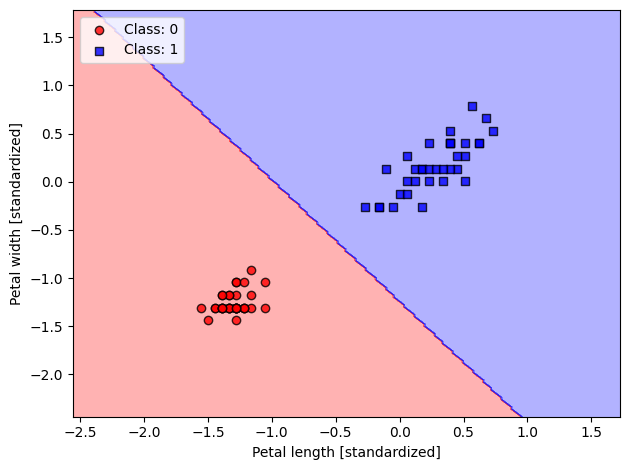

In [7]:
# 訓練データとテストデータの可視化
from study_pytorch.plot_util import plot_decision_regions
import matplotlib.pyplot as plt

plot_decision_regions(X=X_train_01_subset, y=y_train_01_subset, classifier=lrgd)
plt.xlabel("Petal length [standardized]")
plt.ylabel("Petal width [standardized]")
plt.legend(loc="upper left")

plt.tight_layout()
plt.show()

In [8]:
ada = LoggisticRegressionGD(eta=0.3, n_iter=1000, random_state=1)

ada.fit(X_train_01_subset, y_train_01_subset)

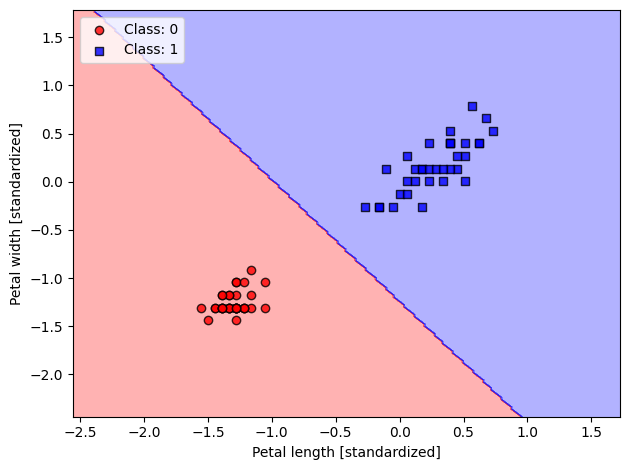

In [9]:
# 訓練データとテストデータの可視化
from study_pytorch.plot_util import plot_decision_regions
import matplotlib.pyplot as plt

plot_decision_regions(X=X_train_01_subset, y=y_train_01_subset, classifier=ada)
plt.xlabel("Petal length [standardized]")
plt.ylabel("Petal width [standardized]")
plt.legend(loc="upper left")

plt.tight_layout()
plt.show()